<a href="https://colab.research.google.com/github/TimurMMD/EDA_projects/blob/main/EDA_exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Project of exam scores
## This Visualisiation analysis seeking answers for several questions:
1. Which countries has best scores?
2. Which faculties and departments?
3. Which score guarantees a student the grant more?

Dataset was taken from Kaggle:
https://www.kaggle.com/datasets/acareren/exam-and-grant-data-of-erasmus-applicants

## 1. Importing libraries and uploading the dataset.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/erasmus.csv')
data

,INDEX,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE,GRANT
0,1,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,2,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,3,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,4,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,5,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1
...,...,...,...,...,...,...,...
336,337,DUTCH,UNIVERSITEIT MAASTRICHT,FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES,POLITICAL SCIENCE AND INTERNATIONAL RELATIONS,62.13,0
337,338,POLAND,KUJAWSKO - POMORSKA SZKOLA WYZSZA W BYDGOSZCZY,FACULTY OF ENGINEERING,CIVIL ENGINEERING,61.63,0
338,339,BELGIUM,HOGESCHOOL GENT,FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES,INTERNATIONAL FINANCE,59.93,0
339,340,DUTCH,STİCHTİNG HANZEHOGESCHOOL GRONİNGEN,FACULTY OF COMMUNICATION,ADVERTISING DESIGN AND COMMUNICATION,56.58,0


## 2. Exploring data, implementing changes if it is necessary, and visualising the data.

In [3]:
# We don't need an INDEX column, so we drop it
data.drop('INDEX', inplace=True, axis=1)
data

,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE,GRANT
0,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1
...,...,...,...,...,...,...
336,DUTCH,UNIVERSITEIT MAASTRICHT,FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES,POLITICAL SCIENCE AND INTERNATIONAL RELATIONS,62.13,0
337,POLAND,KUJAWSKO - POMORSKA SZKOLA WYZSZA W BYDGOSZCZY,FACULTY OF ENGINEERING,CIVIL ENGINEERING,61.63,0
338,BELGIUM,HOGESCHOOL GENT,FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES,INTERNATIONAL FINANCE,59.93,0
339,DUTCH,STİCHTİNG HANZEHOGESCHOOL GRONİNGEN,FACULTY OF COMMUNICATION,ADVERTISING DESIGN AND COMMUNICATION,56.58,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COUNTRIES     341 non-null    object 
 1   UNIVERSITIES  341 non-null    object 
 2   FACULTIES     341 non-null    object 
 3   DEPARTMENTS   339 non-null    object 
 4   EXAM SCORE    341 non-null    float64
 5   GRANT         341 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 16.1+ KB


In [5]:
data.describe()

,EXAM SCORE,GRANT
count,341.000000,341.000000
mean,79.138944,0.434018
std,8.565175,0.496356
min,51.400000,0.000000
25%,73.570000,0.000000
50%,79.300000,0.000000
75%,85.280000,1.000000
max,98.500000,1.000000


In [6]:
# Departments column has 2 missing values. As we have 341 rows in general, we can sacrify 2 of it.
data.isna().sum()

COUNTRIES       0
UNIVERSITIES    0
FACULTIES       0
DEPARTMENTS     2
EXAM SCORE      0
GRANT           0
dtype: int64

In [7]:
# Drop missing values
data.dropna(inplace=True)

In [9]:
# Check that there is no missing values now
data.isna().sum()

COUNTRIES       0
UNIVERSITIES    0
FACULTIES       0
DEPARTMENTS     0
EXAM SCORE      0
GRANT           0
dtype: int64

In [11]:
# Get the list of the faculties
data['FACULTIES'].value_counts()

FACULTIES
FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES    73
FACULTY OF ENGINEERING                              69
FACULTY OF ARTS AND SCIENCES                        53
FACULTY OF COMMUNICATION                            32
FACULTY OF LAW                                      23
 FACULTY OF COMPUTER AND INFORMATION SCIENCES       22
FACULTY OF ARCHITECTURE                             18
FACULTY OF HEALTH SCIENCES                          16
FACULTY OF EDUCATION                                16
FACULTY OF FINE ARTS                                 8
FACULTY OF PHARMACY                                  5
FACULTY OF MEDICINE                                  2
GRADUATE SCHOOL OF SOCIAL SCIENCES                   2
Name: count, dtype: int64

In [12]:
# Rename the faculties name for convinience
faculties = ['FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES',
             'FACULTY OF ENGINEERING',
             'FACULTY OF ARTS AND SCIENCES',
             'FACULTY OF COMMUNICATION',
             'FACULTY OF LAW',
             ' FACULTY OF COMPUTER AND INFORMATION SCIENCES',
             'FACULTY OF ARCHITECTURE',
             'FACULTY OF HEALTH SCIENCES',
             'FACULTY OF EDUCATION',
             'FACULTY OF FINE ARTS',
             'FACULTY OF PHARMACY',
             'FACULTY OF MEDICINE']
new_faculties = ['ECONOMICS AND ADMINISTRATIVE SCIENCES',
                 'ENGINEERING',
                 'ARTS AND SCIENCES',
                 'COMMUNICATION',
                 'LAW',
                 'COMPUTER AND INFORMATION SCIENCES',
                 'ARCHITECTURE',
                 'HEALTH SCIENCES',
                 'EDUCATION',
                 'FINE ARTS',
                 'PHARMACY',
                 'MEDICINE']

# Created two lists that will be used as a replacing parameters
data['FACULTIES'].replace(to_replace=faculties, value=new_faculties, inplace=True)

In [14]:
# Check the new names for faculties
# That looks much better!
data.value_counts('FACULTIES')

FACULTIES
ECONOMICS AND ADMINISTRATIVE SCIENCES    73
ENGINEERING                              69
ARTS AND SCIENCES                        53
COMMUNICATION                            32
LAW                                      23
COMPUTER AND INFORMATION SCIENCES        22
ARCHITECTURE                             18
EDUCATION                                16
HEALTH SCIENCES                          16
FINE ARTS                                 8
PHARMACY                                  5
GRADUATE SCHOOL OF SOCIAL SCIENCES        2
MEDICINE                                  2
Name: count, dtype: int64

In [15]:
# Creating new dataframe, where exam score is calculated as average per each faculty.
exams_by_faculties = data.groupby('FACULTIES')['EXAM SCORE'].mean()

In [16]:
# Sort values in descending order for better chart comprehension
exams_by_faculties.sort_values(ascending=False, inplace=True)

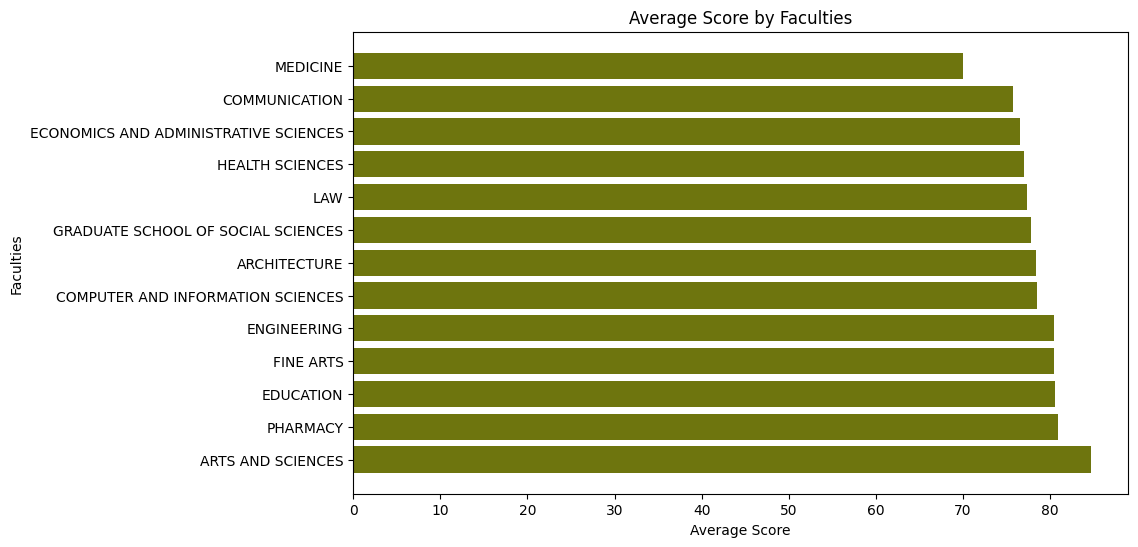

In [51]:
# Making a bar chart, where each bar is a faculty with an average exam score
plt.figure(figsize=(10, 6))
plt.barh(exams_by_faculties.index, exams_by_faculties.values, color='#6e750e')
plt.xlabel('Average Score')
plt.ylabel('Faculties')
plt.title('Average Score by Faculties')
plt.show()

## As we can see from the chart, the best scores has the faculty of the Arts and Sciences with average of almost 85 points, while the poorest reesult is for Medicine faculty being only one faculty with the score lower than 70 points.

In [22]:
# Checking the list of countries
data['COUNTRIES'].value_counts()

COUNTRIES
GERMAN            67
DUTCH             62
POLAND            45
SPAIN             26
ITALIA            24
FRANCE            23
BELGIUM           13
AUSTRIA           13
HUNGARY           11
ROMANIA           10
PORTUGUESE         7
LITHUANIA          7
GREECE             5
DENMARK            5
CZECH REPUBLIC     4
SLOVENIA           3
SWEDISH            3
IRELAND            3
FINLAND            3
CROATIA            3
BULGARIA           1
NORWAY             1
Name: count, dtype: int64

In [40]:
# Let's change the names of a few countries: 'Germany', 'Netherlands', and 'Portugal'
old_countries = ['GERMAN', 'DUTCH', 'PORTUGUESE', 'SWEDISH', 'ITALIA']
new_countries = ['GERMANY', 'NETHERLANDS', 'PORTUGAL', 'SWEDEN', 'ITALY']
data['COUNTRIES'].replace(to_replace=old_countries, value=new_countries, inplace=True)

In [41]:
# Check if everything is correct now
std_number_country = data['COUNTRIES'].value_counts()

In [46]:
# Grouping by country and calculating the average scores. Sort in ascending order
exams_by_countries = data.groupby('COUNTRIES')['EXAM SCORE'].mean()
exams_by_countries.sort_values(ascending=True, inplace=True)

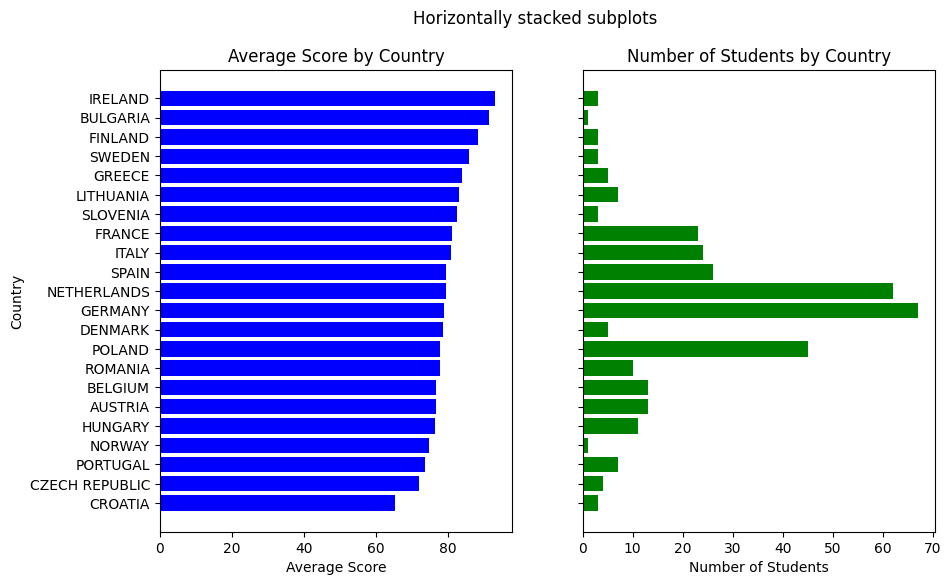

In [43]:
# Creating 2 subplots to make a reasonable conclusion.
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
fig.suptitle('Horizontally stacked subplots')
ax1.barh(exams_by_countries.index, exams_by_countries.values, color='blue', animated=True)
ax1.set_title('Average Score by Country')
ax1.set_xlabel('Average Score')
ax1.set_ylabel('Country')
ax2.barh(std_number_country.index, std_number_country.values, color='green', animated=True)
ax2.set_title('Number of Students by Country')
ax2.set_xlabel('Number of Students')
plt.show()

####From this chart, we can see that although Ireland and Bulgaria show the best results, their small number of students is insufficient to conclude their superiority among other countries. France, Spain, and Italy demonstrate much better results, with over 20 students each. However, the standout countries are the Netherlands and Germany, with more than 60 students each, and their results are comparable to those of France, Italy, and Spain.

##The main conclusion is that increasing the number of students taking the exam tends to result in an average score of around 80 out of 100. This is strongly demonstrated by the normal distribution of the number of students placed in order of their results.

In [44]:
# Check the departments column values
# The number of departments is too high. So the distribution by them wouldn't give much information. But let's check it.
data['DEPARTMENTS'].value_counts()

DEPARTMENTS
COMPUTER ENGINEERING                                      25
LAW                                                       23
PSYCHOLOGY                                                18
BUSINESS ADMINISTRATION                                   18
POLITICAL SCIENCE AND INTERNATIONAL RELATIONS             15
INTERNATIONAL TRADE AND BUSINESS                          13
ENGLISH LANGUAGE AND LITERATURE                           12
INDUSTRIAL ENGINEERING                                    12
MANAGEMENT INFORMATION SYSTEMS                            11
ENGLISH LANGUAGE TEACHING                                 11
VISUAL COMMUNICATION AND DESIGN                            9
ARCHITECTURE                                               9
GENETICS AND BIOENGINEERING                                8
INFORMATION SYSTEMS AND TECHNOLOGIES                       8
PHYSIOTHERAPY AND REHABILITATION                           8
ADVERTISING DESIGN AND COMMUNICATION                       8
RADIO TELEVI

In [47]:
exams_by_departments = data.groupby('DEPARTMENTS')['EXAM SCORE'].mean()
exams_by_departments.sort_values(ascending=True, inplace=True)

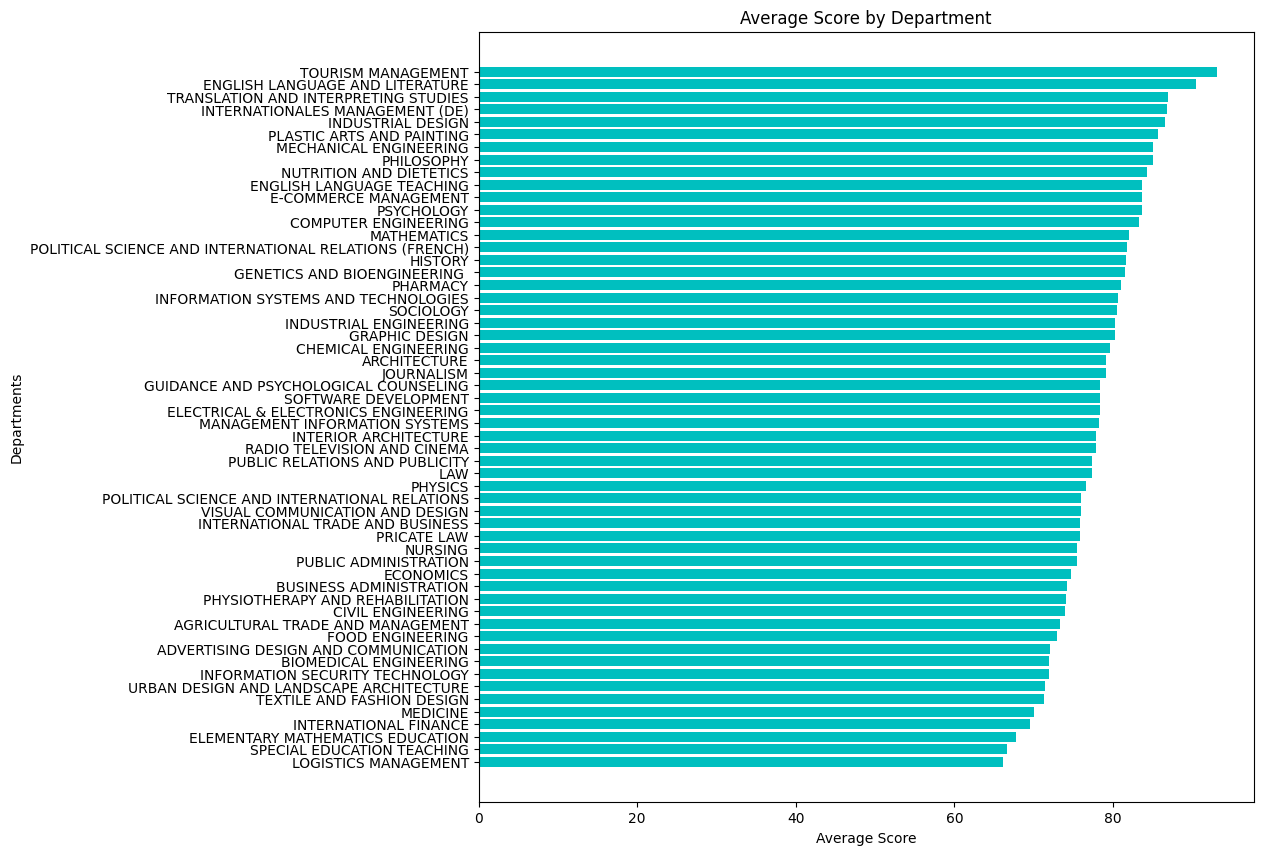

In [50]:
# Making a bar chart, where each bar is a department with an average exam score
plt.figure(figsize=(10, 10))
plt.barh(exams_by_departments.index, exams_by_departments.values, color='c')
plt.xlabel('Average Score')
plt.ylabel('Departments')
plt.title('Average Score by Department')
plt.show()

##This chart is too noisy and doesn't provide much information, especially considering that university departments differ across faculties. However, it is a good practise to check, even if you are confident about the results.

# 3. The correlation between exam scores and grants

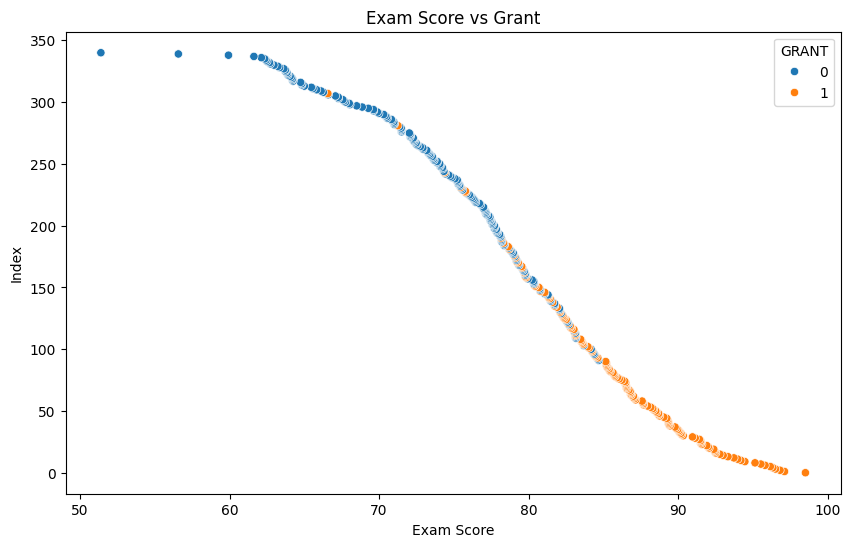

In [57]:
plt.figure(figsize=(10, 6))
x = data['EXAM SCORE']
y = data.index
sns.scatterplot(x=x, y=y, hue=data['GRANT'])
plt.xlabel('Exam Score')
plt.ylabel('Index')
plt.title('Exam Score vs Grant')
plt.show()

Let's take a closer look at it. We can see, that 85+ score guarantees you the grant. On the other hand 75- make your chances almost impossible to get it. So, we will take this gap [75:85] and make a new chart

In [67]:
# Create a new df
data_gap = data[(data['EXAM SCORE'] >= 75) & (data['EXAM SCORE'] <= 85)]

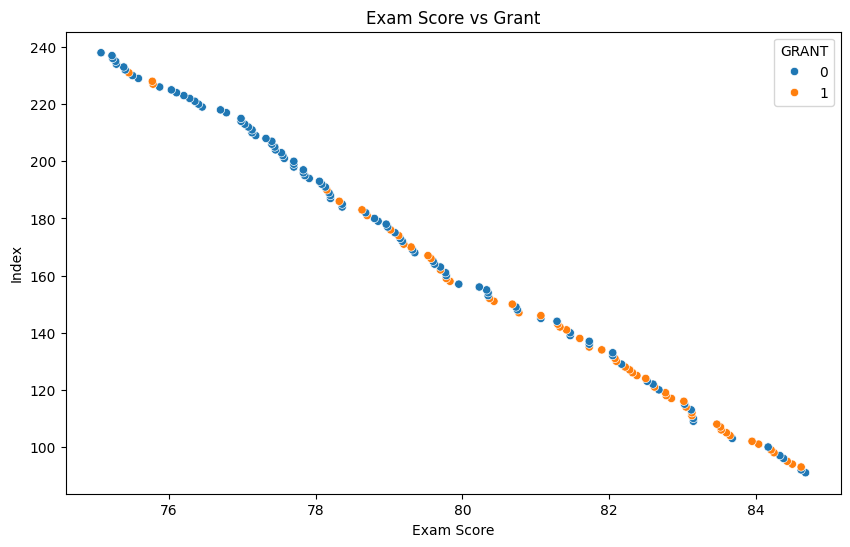

In [68]:
# Build a new chart
plt.figure(figsize=(10, 6))
x = data_gap['EXAM SCORE']
y = data_gap.index
sns.scatterplot(x=x, y=y, hue=data_gap['GRANT'])
plt.xlabel('Exam Score')
plt.ylabel('Index')
plt.title('Exam Score vs Grant')
plt.show()

According to the chart we may roughly say, that 80+ good give a pretty good chance for a grant. But let's make some more analysis.

In [77]:
# Let's calculate average scores to achieve the grant by using mean function
avg_score_for_grant_gap = data_gap[data_gap['GRANT'] == 1]['EXAM SCORE'].mean()
avg_score_for_grant = data[data['GRANT'] == 1]['EXAM SCORE'].mean()

print('The average score of the whole dataset to guarantee the grant is: ' + str(avg_score_for_grant))
print('The average score of the gap dataset to guarantee the grant is: ' + str(avg_score_for_grant_gap))

The average score of the whole dataset to guarantee the grant is: 86.17162162162161
The average score of the gap dataset to guarantee the grant is: 81.39740740740741


In [78]:
# It's a good practise to use median as well in order to minimize the outliers affection on the result.
median_score_for_grant_gap = data_gap[data_gap['GRANT'] == 1]['EXAM SCORE'].median()
median_score_for_grant = data[data['GRANT'] == 1]['EXAM SCORE'].median()

print('The average score of the whole dataset to guarantee the grant is: ' + str(median_score_for_grant))
print('The average score of the gap dataset to guarantee the grant is: ' + str(median_score_for_grant_gap))

The average score of the whole dataset to guarantee the grant is: 86.45
The average score of the gap dataset to guarantee the grant is: 81.99000000000001


To conclude, we can see that to be almost 100% confident in the grant your score should higher than 86, but in reality even 82 guarantees the grant as well.